# Predicting Insurance Premiums Using Linear Regression

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#dataset Load 
df=pd.read_csv(r"D:\datasets\Insurance_prediction\insurance_data.csv")
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [3]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


## Univariant analysis

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


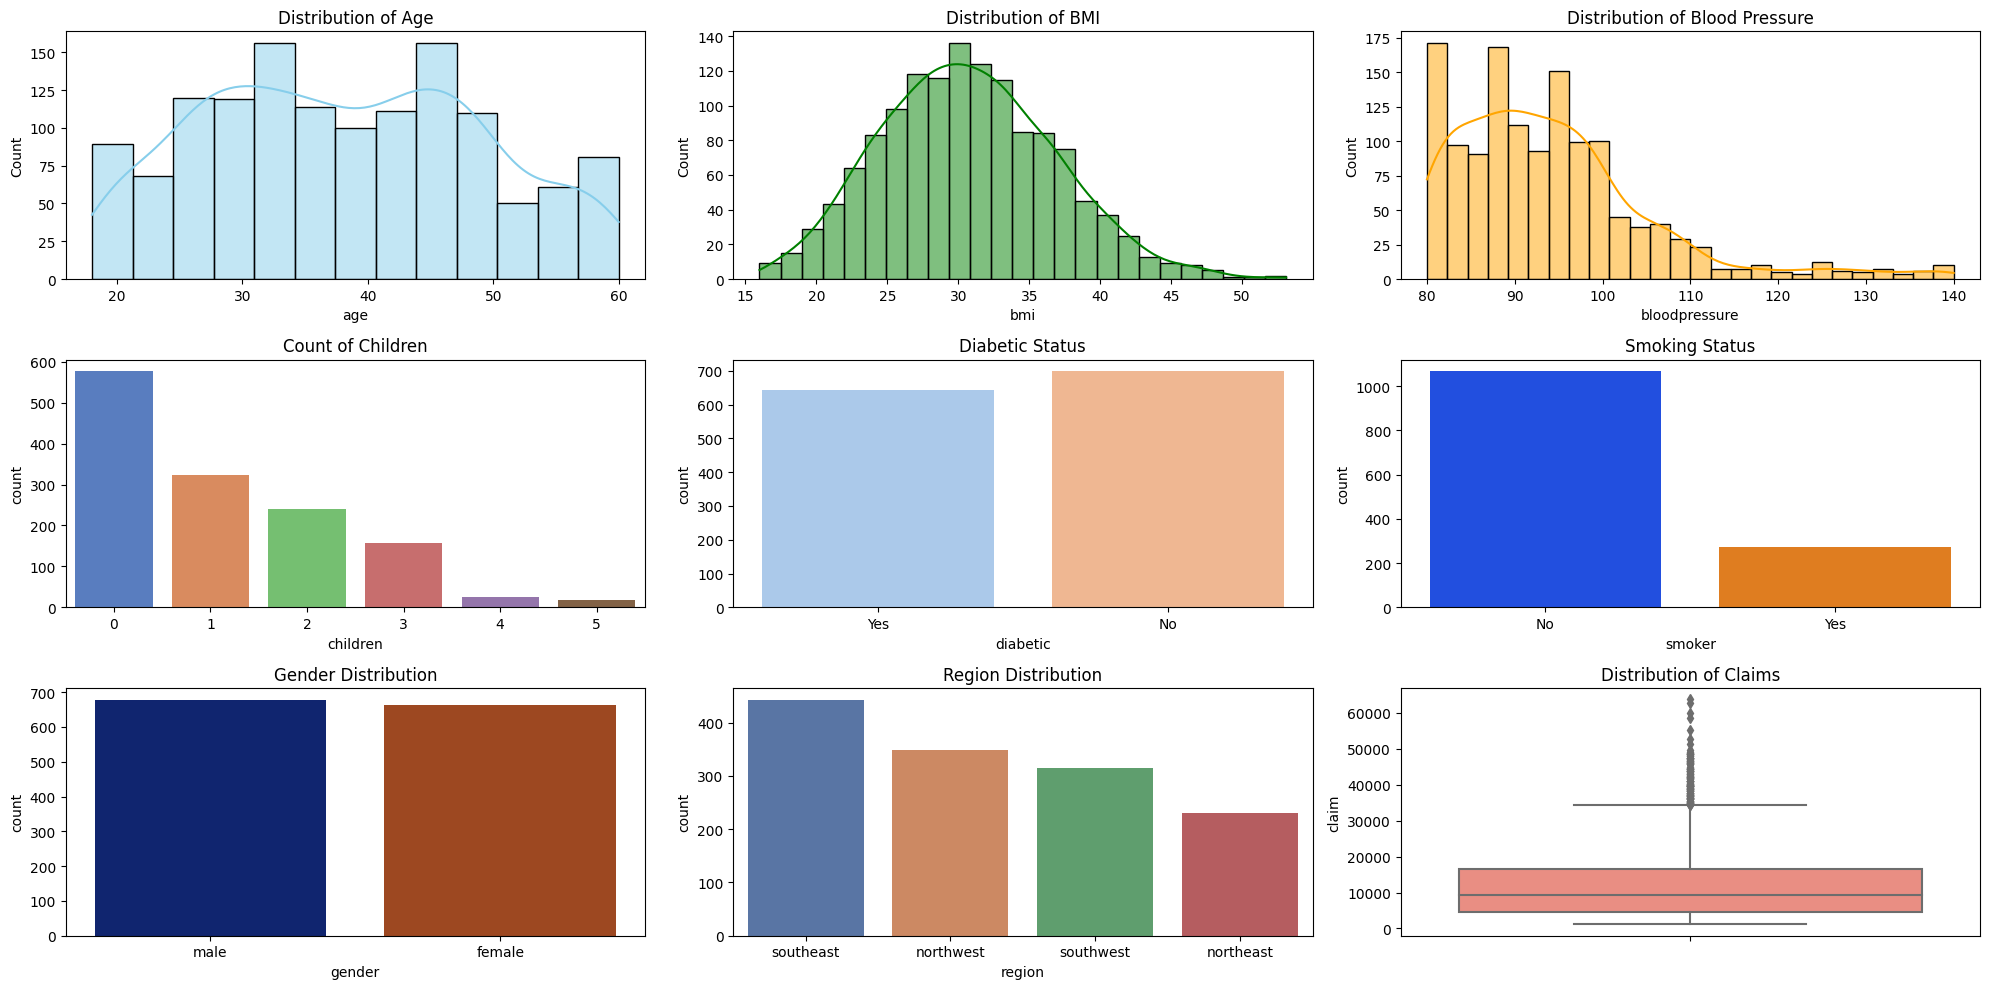

In [4]:
# Set up the figure size for the plots
plt.figure(figsize=(20, 10))

# Plotting for 'age'
plt.subplot(3, 3, 1)  # Subplot for 'age'
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Distribution of Age')

# Plotting for 'bmi'
plt.subplot(3, 3, 2)  # Subplot for 'bmi'
sns.histplot(df['bmi'], kde=True, color='green')
plt.title('Distribution of BMI')

# Plotting for 'bloodpressure'
plt.subplot(3, 3, 3)  # Subplot for 'bloodpressure'
sns.histplot(df['bloodpressure'], kde=True, color='orange')
plt.title('Distribution of Blood Pressure')

# Plotting for 'children'
plt.subplot(3, 3, 4)  # Subplot for 'children'
sns.countplot(data=df, x='children', palette='muted')
plt.title('Count of Children')

# Plotting for 'diabetic'
plt.subplot(3, 3, 5)  # Subplot for 'diabetic'
sns.countplot(data=df, x='diabetic', palette='pastel')
plt.title('Diabetic Status')

# Plotting for 'smoker'
plt.subplot(3, 3, 6)  # Subplot for 'smoker'
sns.countplot(data=df, x='smoker', palette='bright')
plt.title('Smoking Status')

# Plotting for 'gender'
plt.subplot(3, 3, 7)  # Subplot for 'gender'
sns.countplot(data=df, x='gender', palette='dark')
plt.title('Gender Distribution')

# Plotting for 'region'
plt.subplot(3, 3, 8)  # Subplot for 'region'
sns.countplot(data=df, x='region', palette='deep')
plt.title('Region Distribution')

# Plotting for 'claim'
plt.subplot(3, 3, 9)  # Subplot for 'claim'
sns.boxplot(data=df, y='claim', color='salmon')
plt.title('Distribution of Claims')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## Bivariant analysis


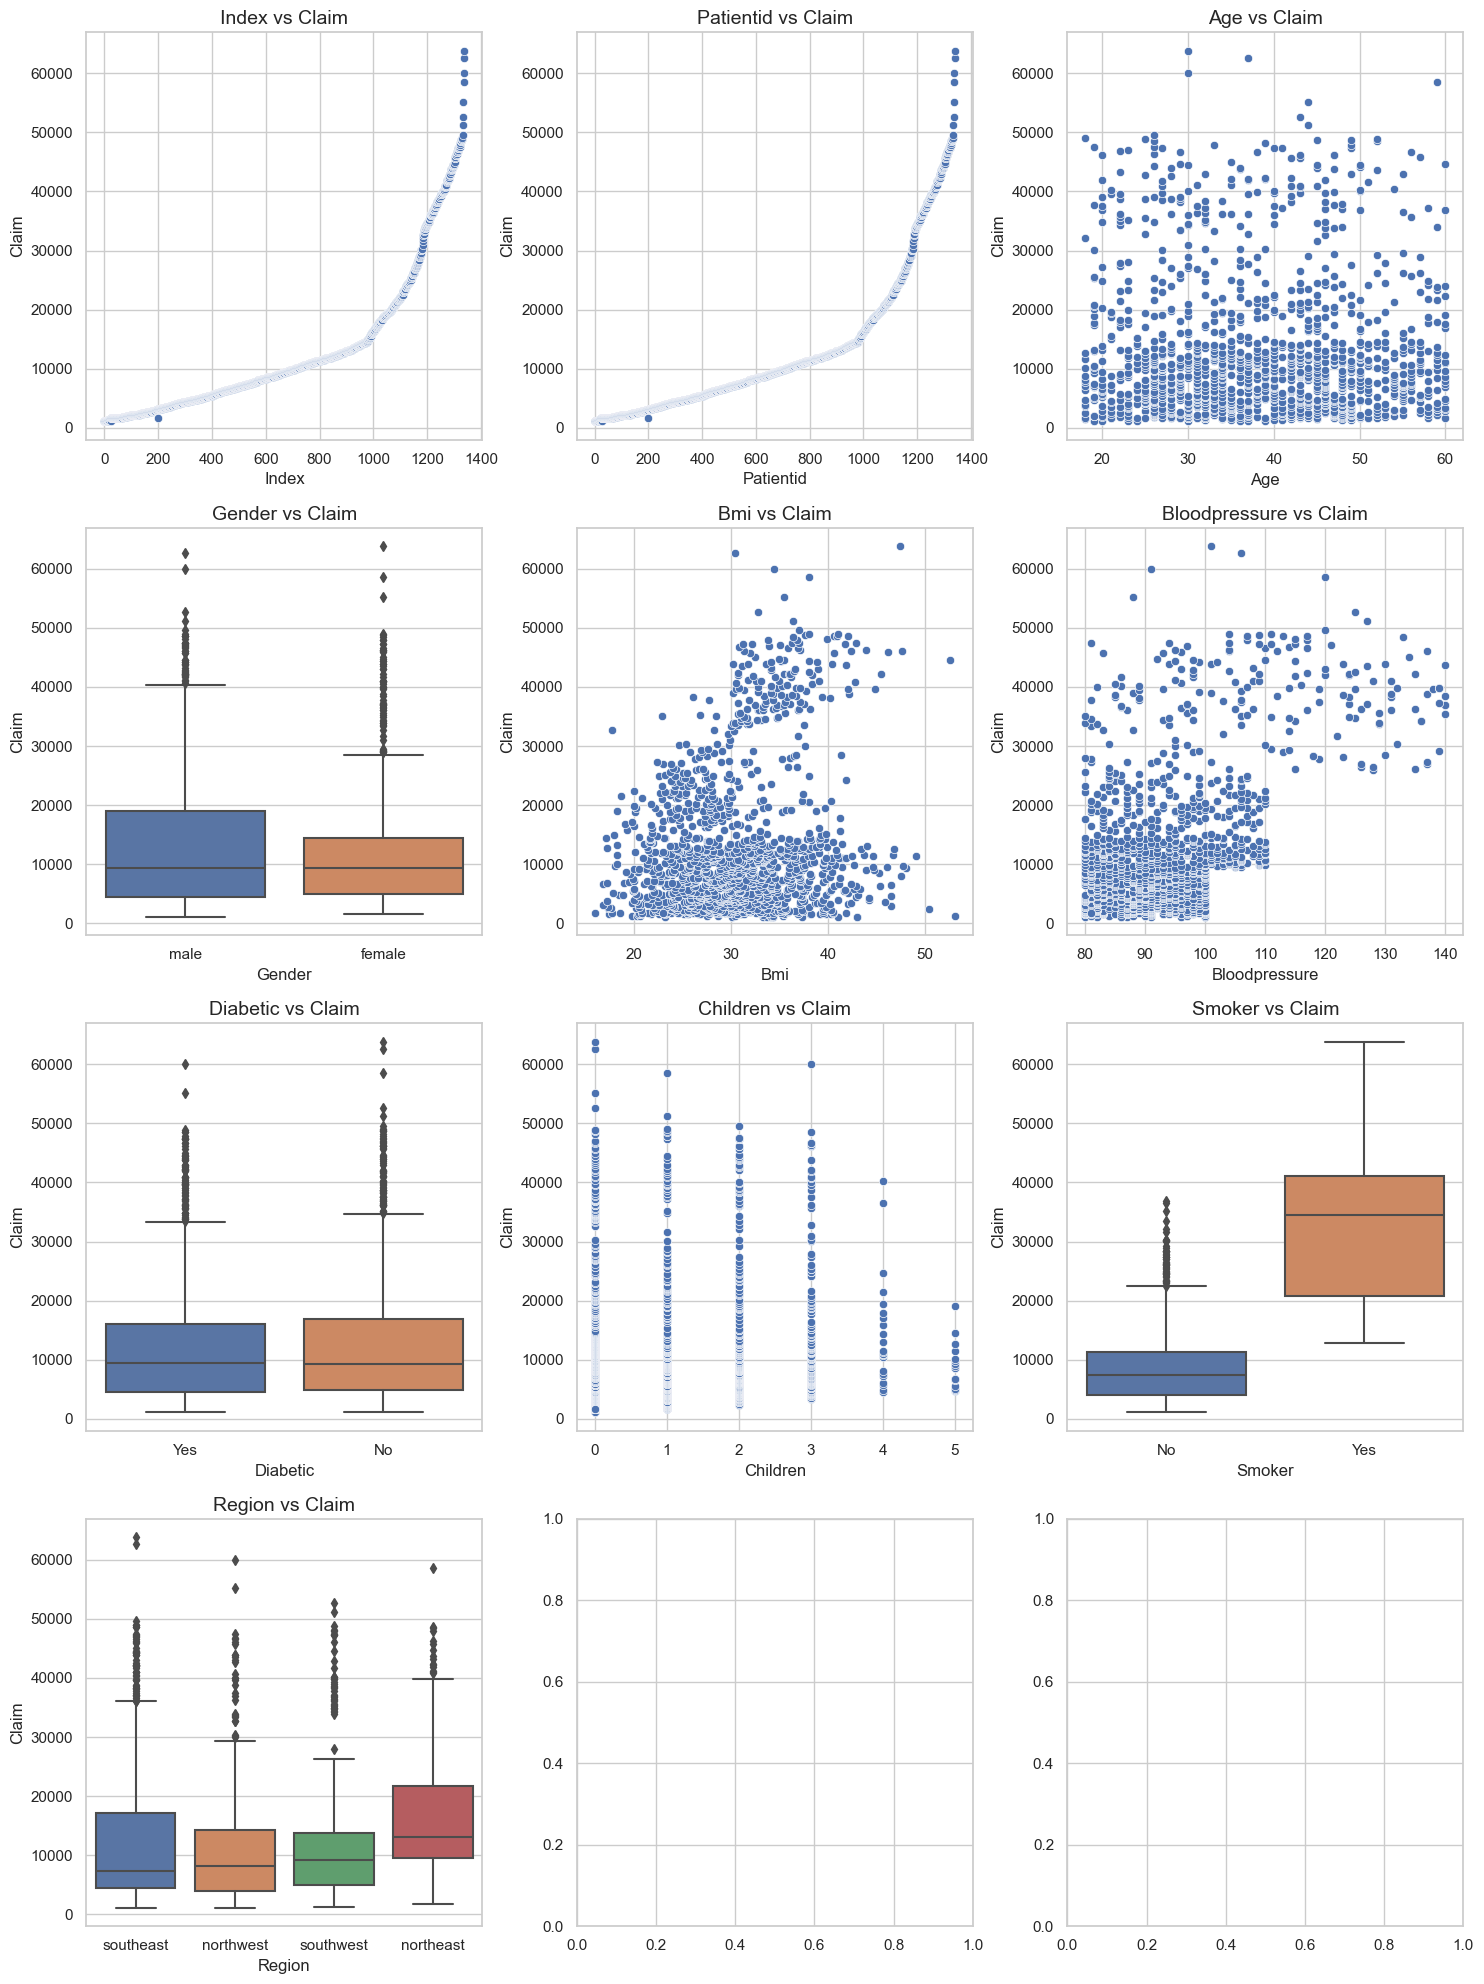

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn plots
sns.set(style="whitegrid")

# List of all columns excluding the target column ('claim')
features = df.columns.drop('claim')

# Calculate number of rows and columns for subplots
num_features = len(features)
num_cols = 3  # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Loop through each feature to create bivariate plots with the target column
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols

    # Select the axis for the current subplot
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Scatter plot for numerical features
    if df[feature].dtype != 'object':  # Check if the feature is numerical
        sns.scatterplot(x=feature, y='claim', data=df, ax=ax)
        ax.set_title(f'{feature.capitalize()} vs Claim', fontsize=14)
        ax.set_xlabel(feature.capitalize(), fontsize=12)
        ax.set_ylabel('Claim', fontsize=12)

    # Box plot for categorical features
    else:
        sns.boxplot(x=feature, y='claim', data=df, ax=ax)
        ax.set_title(f'{feature.capitalize()} vs Claim', fontsize=14)
        ax.set_xlabel(feature.capitalize(), fontsize=12)
        ax.set_ylabel('Claim', fontsize=12)

# Adjust layout and spacing between subplots
plt.tight_layout()
plt.show()


## Multivariant analysis

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

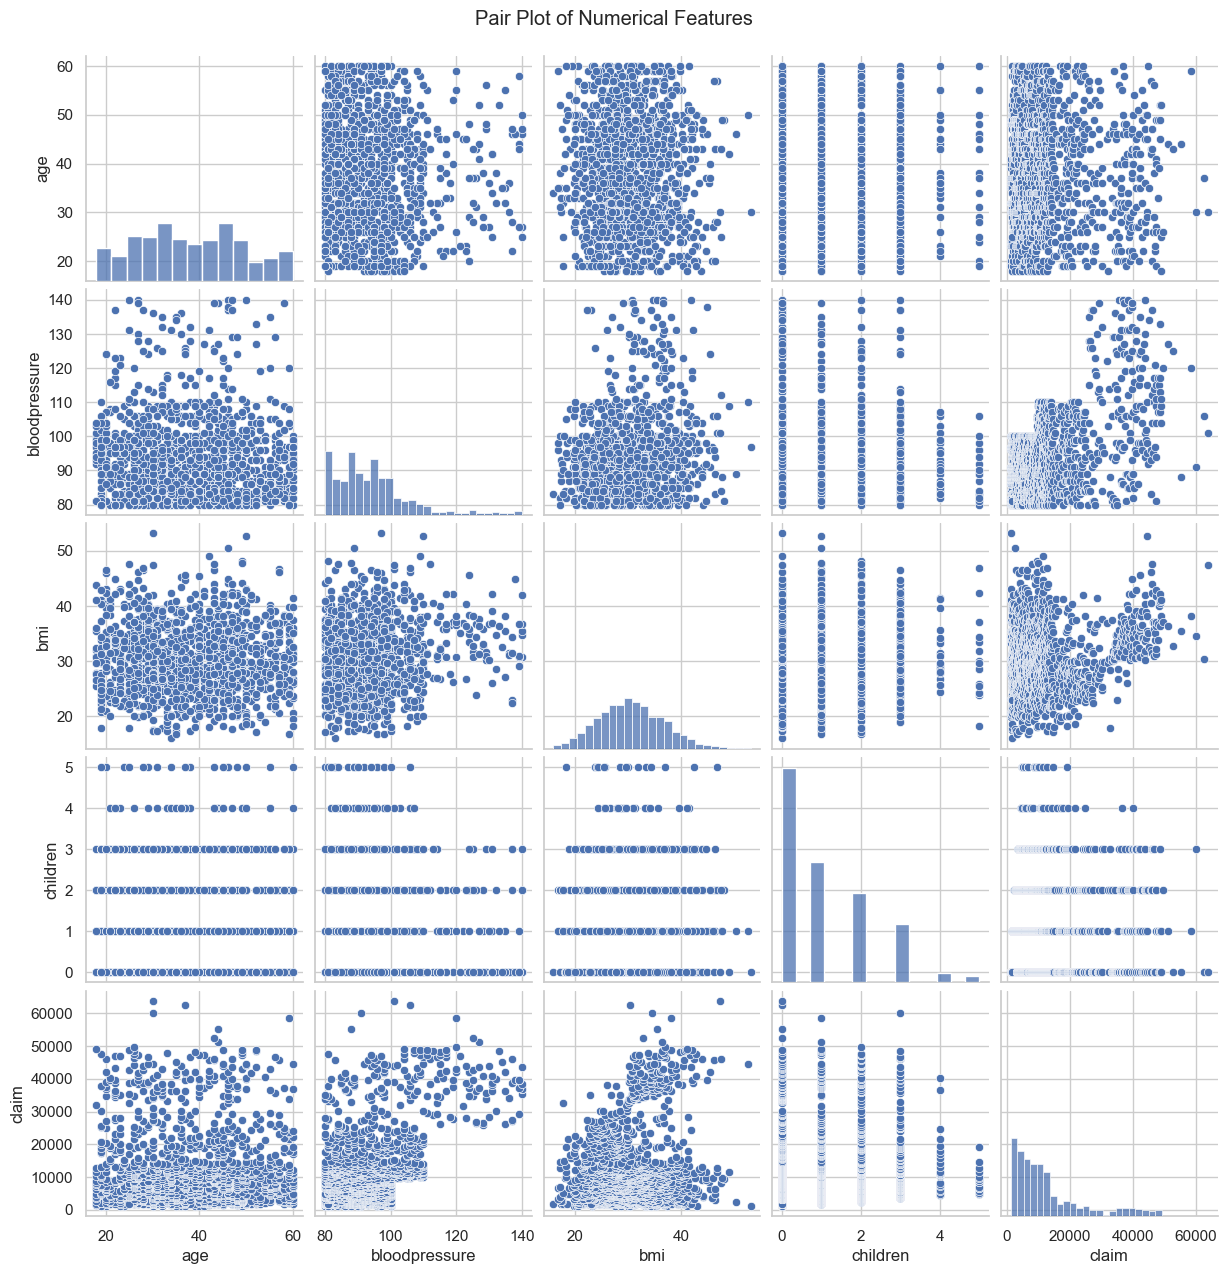

In [6]:
# Assuming df is your DataFrame containing the data
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
# List of columns to drop
columns_to_drop = ['index', 'PatientID']

# Filter numerical_features to exclude columns_to_drop
numerical_features = numerical_features.difference(columns_to_drop)
# Create pair plot of selected numerical features
sns.pairplot(df[numerical_features])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

## Correlation between data 

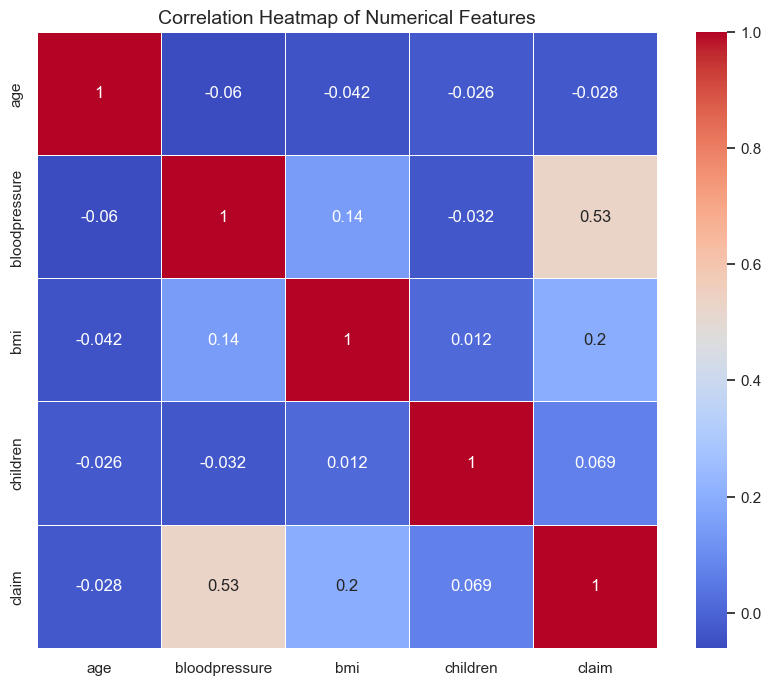

In [7]:
# Compute the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

## Missing values 

In [8]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [9]:
# Calculate the mean of the 'age' column
age_mean = df['age'].mean()

# Replace missing values in 'age' column with the mean
df['age'].fillna(age_mean, inplace=True)

# Replace missing values in 'region' column with the most frequent value (mode)
region_mode = df['region'].mode()[0]  # Get the mode (most frequent value)
df['region'].fillna(region_mode, inplace=True)

In [10]:
df.isnull().sum()

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

## encoding 

In [11]:
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in DataFrame
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is categorical
        df[col] = label_encoder.fit_transform(df[col])

# Display the transformed DataFrame
print(df)

      index  PatientID        age  gender   bmi  bloodpressure  diabetic  \
0         0          1  39.000000       1  23.2             91         1   
1         1          2  24.000000       1  30.1             87         0   
2         2          3  38.078652       1  33.3             82         1   
3         3          4  38.078652       1  33.7             80         0   
4         4          5  38.078652       1  34.1            100         0   
...     ...        ...        ...     ...   ...            ...       ...   
1335   1335       1336  44.000000       0  35.5             88         1   
1336   1336       1337  59.000000       0  38.1            120         0   
1337   1337       1338  30.000000       1  34.5             91         1   
1338   1338       1339  37.000000       1  30.4            106         0   
1339   1339       1340  30.000000       0  47.4            101         0   

      children  smoker  region     claim  
0            0       0       2   1121.87  
1

In [12]:
df.tail(10)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1330,1330,1331,25.0,0,38.1,111,0,0,1,2,48885.14
1331,1331,1332,18.0,1,41.1,104,0,1,1,2,48970.25
1332,1332,1333,26.0,1,37.0,120,0,2,1,2,49577.66
1333,1333,1334,44.0,1,36.4,127,0,1,1,3,51194.56
1334,1334,1335,43.0,1,32.8,125,0,0,1,3,52590.83
1335,1335,1336,44.0,0,35.5,88,1,0,1,1,55135.40
1336,1336,1337,59.0,0,38.1,120,0,1,1,0,58571.07
1337,1337,1338,30.0,1,34.5,91,1,3,1,1,60021.40
1338,1338,1339,37.0,1,30.4,106,0,0,1,2,62592.87
1339,1339,1340,30.0,0,47.4,101,0,0,1,2,63770.43


In [23]:
#In our data already dropped the Index and patientID because that columns are unnecessary to train 
#Feature Selections are done
#we have the Preprocessed data
df = df.drop('PatientID', axis=1)
df.head()

,index,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,39.000000,1,23.2,91,1,0,0,2,1121.87
1,1,24.000000,1,30.1,87,0,0,0,2,1131.51
2,2,38.078652,1,33.3,82,1,0,0,2,1135.94
3,3,38.078652,1,33.7,80,0,0,0,1,1136.40
4,4,38.078652,1,34.1,100,0,0,0,1,1137.01


In [25]:
df = df.drop('index', axis=1)
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,1,23.2,91,1,0,0,2,1121.87
1,24.000000,1,30.1,87,0,0,0,2,1131.51
2,38.078652,1,33.3,82,1,0,0,2,1135.94
3,38.078652,1,33.7,80,0,0,0,1,1136.40
4,38.078652,1,34.1,100,0,0,0,1,1137.01


In [26]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with features and a target column 'claim'
# Splitting the data into features (X) and target (y)
X = df.drop(columns=['claim'])  # Features
y = df['claim']  # Target

# Perform train-test split with a 70-30 ratio (70% training data, 30% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (938, 8)
Shape of X_test: (402, 8)
Shape of y_train: (938,)
Shape of y_test: (402,)


In [15]:
#Data's are Balanced , if not Balanced data means apply SMOTE technique to balance the data.

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)



LinearRegression()

In [28]:

pred=reg.predict(X_test)
pred

array([ 8191.8711877 ,  6540.52164738,  7920.52739233,  4322.43255786,
        9868.03889416,  5819.09536112, 27774.02375928, 30775.1745583 ,
        8085.70997414, 10773.30403679,  9778.85396138,  9734.17762024,
        5785.18099935,  7541.45801307,  9063.85103908,  7431.46172471,
       24856.6844489 , 13610.62650362,  1374.89210669,  7824.07480724,
       10418.20412592,  9995.25460111,  5220.87719032,  9720.58497696,
       30735.61470031,  7682.08699671, 11224.99687802, 10793.80553697,
        9106.31346118,  8833.61824957, 30431.32556725,  9379.73529378,
        7445.31026856, 30485.95805859, 10787.31142856,  7609.6765343 ,
        5006.13221482, 10757.02494762,  5456.84520393,  3240.62916211,
        5905.48753601,  6928.39965656, 10690.32971722,  8919.02268992,
        3914.22659243, 12043.0178207 ,  2568.54486385,  9917.65946311,
       13835.68525666,  3465.15733851,  7333.58819828, 28284.89225776,
        6846.3046464 , 28963.59393361,  9844.95494221,  9222.02376628,
      

In [29]:
# Calculating evaluation metrics (e.g., RMSE, R-squared)
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Root Mean Squared Error (RMSE): 6589.98
R-squared (R2): 0.73


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
data={ 'age':50 ,'gender':1, 'bmi':25,'bloodpressure':120,'diabetic':1, 'children':2 , 'smoker':1,'region':3}
index=[0]
cust_df=pd.DataFrame(data,index)
cust_df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region
0,50,1,25,120,1,2,1,3


In [31]:
new=reg.predict(cust_df)
print("Insurance claim for new customer ",new)

Insurance claim for new customer  [33529.13373897]


In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np

# Linear Regression
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)
y_pred_linear = reg_linear.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
adj_r2_linear = 1 - (1 - r2_linear) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
reg_poly = LinearRegression()
reg_poly.fit(X_poly_train, y_train)
y_pred_poly = reg_poly.predict(X_poly_test)
r2_poly = r2_score(y_test, y_pred_poly)
adj_r2_poly = 1 - (1 - r2_poly) * (len(y_test) - 1) / (len(y_test) - X_poly_test.shape[1] - 1)

# Lasso Regression
reg_lasso = Lasso()
reg_lasso.fit(X_train, y_train)
y_pred_lasso = reg_lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
adj_r2_lasso = 1 - (1 - r2_lasso) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Ridge Regression
reg_ridge = Ridge()
reg_ridge.fit(X_train, y_train)
y_pred_ridge = reg_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
adj_r2_ridge = 1 - (1 - r2_ridge) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Elastic Net Regression
reg_en = ElasticNet()
reg_en.fit(X_train, y_train)
y_pred_en = reg_en.predict(X_test)
r2_en = r2_score(y_test, y_pred_en)
adj_r2_en = 1 - (1 - r2_en) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Display results
print("Linear Regression - R2 Score:", r2_linear, "Adjusted R2 Score:", adj_r2_linear)
print("Polynomial Regression - R2 Score:", r2_poly, "Adjusted R2 Score:", adj_r2_poly)
print("Lasso Regression - R2 Score:", r2_lasso, "Adjusted R2 Score:", adj_r2_lasso)
print("Ridge Regression - R2 Score:", r2_ridge, "Adjusted R2 Score:", adj_r2_ridge)
print("Elastic Net Regression - R2 Score:", r2_en, "Adjusted R2 Score:", adj_r2_en)


Linear Regression - R2 Score: 0.7271179844200317 Adjusted R2 Score: 0.7215631342301088
Polynomial Regression - R2 Score: 0.7071360075285987 Adjusted R2 Score: 0.6701166826375509
Lasso Regression - R2 Score: 0.7270904847151305 Adjusted R2 Score: 0.7215350747347768
Ridge Regression - R2 Score: 0.7262702668517131 Adjusted R2 Score: 0.7206981603245215
Elastic Net Regression - R2 Score: 0.42854766798719257 Adjusted R2 Score: 0.41691505054163924


In [34]:
# we choose Linear regression 
# Save the model to a file using pickle
import pickle
with open('Insurance_linear_model.pkl', 'wb') as f:
    pickle.dump(reg, f)

print("Model saved successfully.")

Model saved successfully.
